### Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
plt.style.use('seaborn')


import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=2)

In [2]:
# 1. 데이터 로드
data = pd.read_csv('../input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 2. null 데이터 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

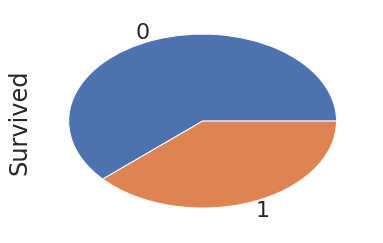

In [5]:
# pandas 의 함수로 리턴되면 plot가 종속되어 있어 바로 그래프로 그릴수 있음.
data['Survived'].value_counts().plot.pie()

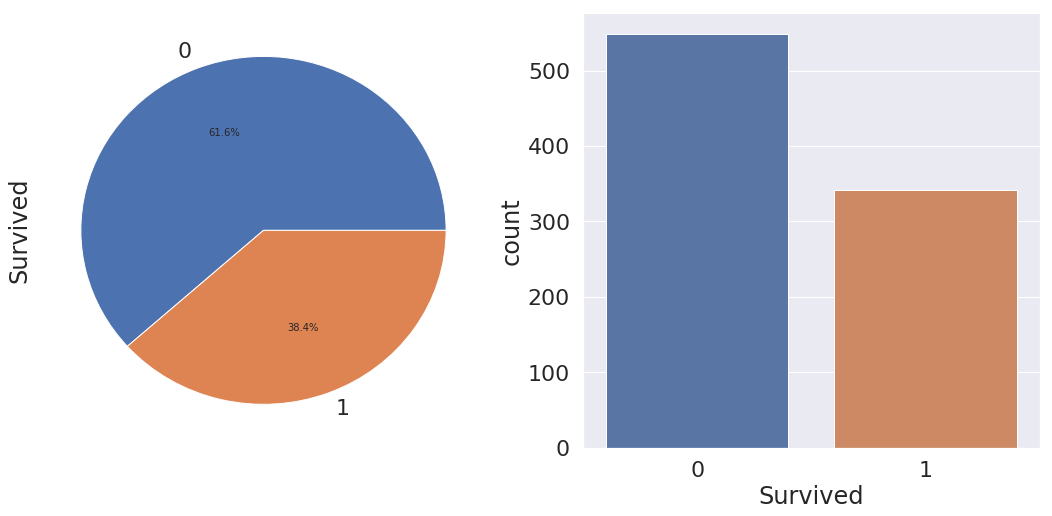

In [6]:
f,ax = plt.subplots(1,2,figsize=(18,8))

# pie 그래프 설정
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])

# count 그래프 설정
sns.countplot('Survived',data=data,ax=ax[1])

Out of 891 passengers in trainging set, only around 350 survived i.e only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the dta and see which categoryies of the passengers did suvive and who didn't.

- We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation. Age, etc.

Fist let us understand the different types of features.


### Sex--> Categorical Feature





In [7]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

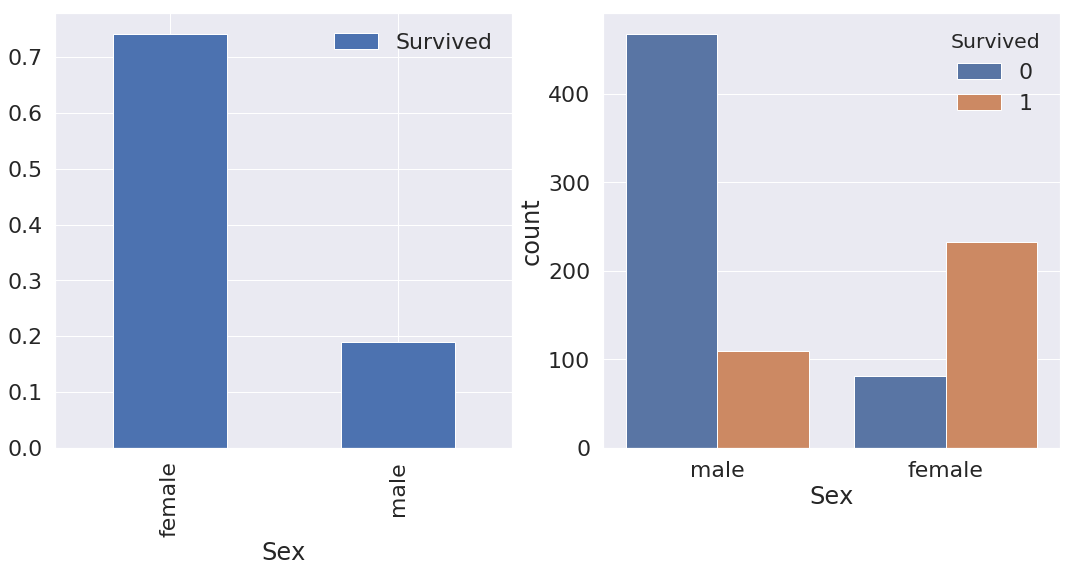

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])

sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
plt.show()

In [9]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


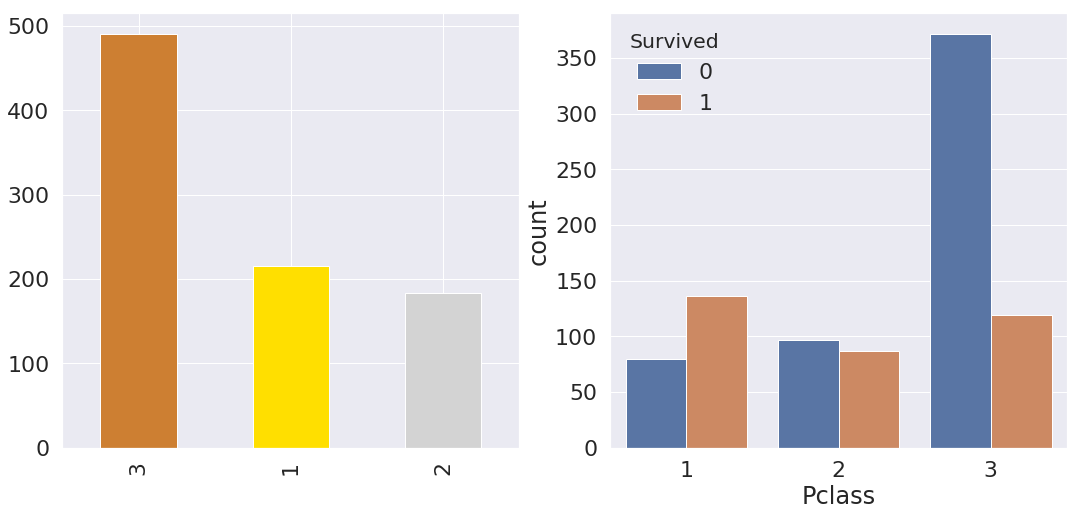

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])

sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
plt.show()

In [11]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

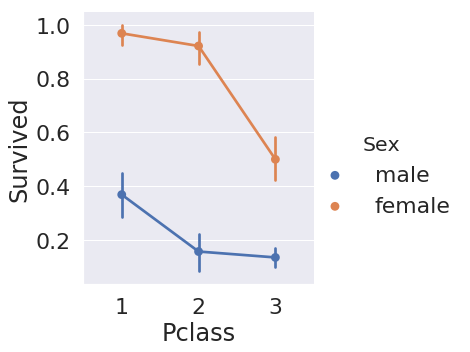

In [12]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()